# Data Preprocessing using pyspark and sparksql
In this file we have loaded dataset from Amazon Product Review Dataset for the Category, Musical Instruments. The source file is in JSON format. The dataset contails data from 1996 till 2019.

In [2]:
import findspark
findspark.init()
import pyspark
import os
import numpy as np
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql import SQLContext
import json

In [3]:
spark = SparkSession \
    .builder \
    .appName("Recommendation_System") \
    .getOrCreate()

In [4]:
sc = spark.sparkContext
# Default Partitions
sc.defaultParallelism

8

In [6]:
sqlContext = SQLContext(sc)

In [7]:
#loding data from json file and saving as a table
sqlContext.read.json('Musical_Instruments.json').createOrReplaceTempView("Temp_table")
#verifying table structure of Temp_table
spark.sql("desc Temp_table").show()

+--------------+--------------------+-------+
|      col_name|           data_type|comment|
+--------------+--------------------+-------+
|          asin|              string|   null|
|         image|       array<string>|   null|
|       overall|              double|   null|
|    reviewText|              string|   null|
|    reviewTime|              string|   null|
|    reviewerID|              string|   null|
|  reviewerName|              string|   null|
|         style|struct<Color Name...|   null|
|       summary|              string|   null|
|unixReviewTime|              bigint|   null|
|      verified|             boolean|   null|
|          vote|              string|   null|
+--------------+--------------------+-------+



In [8]:
#verifying data in Temp_table
spark.sql("select * from Temp_table").show()

+----------+-----+-------+--------------------+-----------+--------------+-------------------+--------------------+--------------------+--------------+--------+----+
|      asin|image|overall|          reviewText| reviewTime|    reviewerID|       reviewerName|               style|             summary|unixReviewTime|verified|vote|
+----------+-----+-------+--------------------+-----------+--------------+-------------------+--------------------+--------------------+--------------+--------+----+
|0470536454| null|    5.0|Crocheting for Du...| 08 9, 2004| AXHY24HWOF184|              Bendy|[,,,,  Paperback,...|Terrific Book for...|    1092009600|   false|  90|
|0470536454| null|    4.0|     Very helpful...| 04 6, 2017|A29OWR79AM796H|    Amazon Customer|[,,,,  Hardcover,...|          Four Stars|    1491436800|    true|   2|
|0470536454| null|    5.0|EASY TO UNDERSTAN...|03 14, 2017| AUPWU27A7X5F6|    Amazon Customer|[,,,,  Paperback,...|          Five Stars|    1489449600|    true|null|
|047

In [22]:
#selecting required fields from Temp_Table and storing result as All_Beauty table
spark.sql("SELECT asin,reviewerID,CAST(overall as INT) as overall,CAST(substring(reviewTime,-4) as INT) as Year FROM Temp_table where verified=true").createOrReplaceTempView("Data")
#verifying the table structure
spark.sql("desc Data").show()

+----------+---------+-------+
|  col_name|data_type|comment|
+----------+---------+-------+
|      asin|   string|   null|
|reviewerID|   string|   null|
|   overall|      int|   null|
|      Year|      int|   null|
+----------+---------+-------+



In [23]:
#verifying the data
spark.sql("select * from Data").show()

+----------+--------------+-------+----+
|      asin|    reviewerID|overall|Year|
+----------+--------------+-------+----+
|0470536454|A29OWR79AM796H|      4|2017|
|0470536454| AUPWU27A7X5F6|      5|2017|
|0470536454|A1N69A47D4JO6K|      4|2017|
|0470536454| AHTIQUMVCGBFJ|      5|2017|
|0470536454|A1J8LQ7HVLR9GU|      5|2017|
|0470536454| ABVTZ63S6GOWF|      5|2017|
|0470536454|A2HX9NFBXGSWRW|      4|2016|
|0470536454| AP1TQR64HQRCI|      4|2016|
|0470536454| A37FC9MED20AO|      5|2016|
|0470536454|A26EU1X4VDNT4Z|      5|2016|
|0470536454|A3II49ZWIOZF92|      3|2016|
|0470536454|A347LQX3G500YN|      5|2016|
|0470536454|A2FPOGMO1CCSUQ|      4|2016|
|0470536454| AL8FRAYQS43LI|      5|2016|
|0470536454| AHVLB4P706L86|      4|2016|
|0470536454| AP609X3Z27XUH|      4|2016|
|0470536454|A17B9D1PXJ3X6I|      5|2016|
|0470536454|A2C7C71PD0ZCC8|      5|2016|
|0470536454|A20TFBX9P653F2|      5|2016|
|0470536454|A2H8PAAQZD5WTE|      5|2016|
+----------+--------------+-------+----+
only showing top

In [24]:
#save the data to a sql dataframe by using select query
df=spark.sql("select asin,reviewerID,overall from Data where Year>2015 and asin in (select asin from (select asin,count(reviewerID) as reviews from Data  where Year>2015 group by asin having reviews>5)A)")
df.show()

+----------+--------------+-------+
|      asin|    reviewerID|overall|
+----------+--------------+-------+
|B0002D02NA|A3FCYPKFJQHYRN|      5|
|B0002D02NA|A3IDJW1W0MG8SN|      5|
|B0002D02NA| AB7DDYDJU64T7|      5|
|B0002D02NA|A3MQJF05OGA0XN|      5|
|B0002D02NA|A2WTF6HR32CMA7|      5|
|B0002D02NA|A3JX7JTU9NI5TL|      5|
|B0002D02NA|A1JGWBGTU9PE45|      5|
|B0002D02NA|A2T91VR17RTAK7|      5|
|B0002D02NA|A2BSB6VSY6UM3H|      3|
|B0002D02NA| A2E47ZNGSMC64|      4|
|B0002D02NA| ABXPR6SNUUUZR|      5|
|B0002D02NA|A2CJ6FA26ETI03|      5|
|B0002D02NA| A8BNX28259701|      5|
|B0002D02NA| AC8VMJ4OEIHYO|      5|
|B0002D02NA|A1FQYT05GY9M04|      5|
|B0002D02NA|A1HC1NOGVMCNUA|      5|
|B0002D02NA|A1Z7FZH0SE5TJ5|      5|
|B0002D02NA|A2E64XLZSU0P5L|      5|
|B0002D02NA|A3UD50M7M72150|      4|
|B0002D02NA|A19X5GXMJZLM8Y|      5|
+----------+--------------+-------+
only showing top 20 rows



We have filtered the source data set and stored it into spark data frame. The data in df is for only verified users and from year 2016 and onwards.
For storing this data we will convert this data into pandas dataframe and save it as csv file.

In [30]:
#covert spark sql dataframe to pandas dataframe
pd=df.toPandas()
#save pandas dataframe to csv file for reference
pd.to_csv(r'Musical_Instruments_Processed.csv', index = False)

# Checking the processed data details

In [26]:
number_of_unique_products = len(pd['asin'].unique())
number_of_unique_users = len(pd['reviewerID'].unique())
number_of_ratings = len(pd)
print("Number of unique products =", number_of_unique_products)
print("Number of unique users =", number_of_unique_users)
print("Number of ratings =", number_of_ratings)

Number of unique products = 16451
Number of unique users = 389468
Number of ratings = 568425


Visual representation of the data as below:

In [27]:
import math
import scipy.stats as stats
from scipy.sparse import csc_matrix, csr_matrix
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

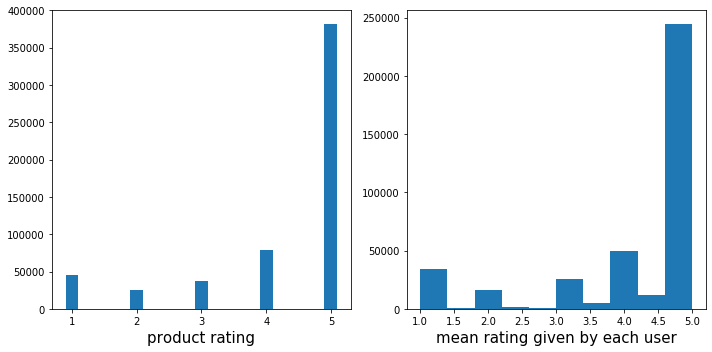

In [28]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.hist(pd['overall'], bins=[0.9, 1.1, 1.9, 2.1, 2.9, 3.1, 3.9, 4.1, 4.9, 5.1])
ax.set_xlabel('product rating', fontsize=15)

# mean ratings from each user
mean_rating_of_user = pd.groupby('reviewerID').apply(lambda x: x['overall'].mean())
ax = fig.add_subplot(122)
ax.hist(mean_rating_of_user)
ax.set_xlabel('mean rating given by each user', fontsize=15)
plt.tight_layout()
plt.show()

Looks like the distribution is highly skewed towards very positive reviews, which is a well known effect with ratings - unless the customer is highly dissatisfied with a product they will give it a "5".

In [29]:
mean_rating = pd['overall'].mean()
median_rating = pd['overall'].median()
print("Mean rating =", mean_rating)
print("Median rating =", median_rating)

Mean rating = 4.278552139684215
Median rating = 5.0
